In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

# 導入數據 
dataset = pd.read_csv(r'C:/Users/Cindy/Desktop/0728test.csv')
dataset

,Number,Input_A1_001,Input_A1_002,Input_A1_003,Input_A1_004,Input_A1_005,Input_A1_006,Input_A1_007,Input_A1_008,Input_A1_009,...,Input_C_134,Input_C_135,Input_C_136,Input_C_137,Output_A1,Output_A2,Output_A3,Output_A4,Output_A5,Output_A6
0,Test1,0.00,0.00,0.00,0.00,0.00,0.002,0.004,0.002,0.004,...,-0.004,4.00,1.0,1.0,3.202,4.280,2.804,4.805,3.178,2.888
1,Test2,0.00,0.00,0.00,0.00,0.00,0.016,0.004,0.002,0.004,...,0.003,4.00,1.0,1.0,4.303,4.113,2.949,3.073,3.539,4.187
2,Test3,0.00,0.00,0.00,0.00,0.00,0.006,0.006,0.002,0.002,...,-0.003,3.70,1.0,1.0,4.078,3.672,4.303,4.508,3.734,3.013
3,Test4,0.00,0.00,0.02,0.04,0.07,0.004,0.005,0.002,0.005,...,0.004,4.00,0.0,0.0,3.816,3.928,2.827,3.098,3.616,3.018
4,Test5,0.00,0.00,0.00,0.00,0.00,0.012,0.008,0.002,0.003,...,0.004,4.00,1.0,1.0,4.015,3.672,4.514,4.165,3.856,3.494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Test91,0.00,0.00,0.00,0.00,0.00,0.014,0.014,0.002,0.004,...,0.005,0.04,1.0,3.0,4.201,3.300,4.069,3.265,3.602,3.921
91,Test92,0.00,0.00,0.02,0.04,0.09,0.010,0.004,0.002,0.004,...,0.004,0.04,1.0,2.0,3.050,3.502,3.252,3.169,3.689,3.909
92,Test93,0.00,0.00,0.00,0.00,0.00,0.014,0.014,0.002,0.005,...,0.004,0.04,2.0,2.0,3.561,3.739,3.243,3.779,3.113,3.592
93,Test94,0.08,0.06,0.03,0.00,0.00,0.006,0.010,0.002,0.004,...,-0.005,0.04,2.0,2.0,2.863,3.962,3.145,3.212,3.156,3.647


In [2]:
dataset.describe()

,Input_A1_001,Input_A1_002,Input_A1_003,Input_A1_004,Input_A1_005,Input_A1_006,Input_A1_007,Input_A1_008,Input_A1_009,Input_A1_010,...,Input_C_134,Input_C_135,Input_C_136,Input_C_137,Output_A1,Output_A2,Output_A3,Output_A4,Output_A5,Output_A6
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,9.500000e+01,95.000000,9.500000e+01,...,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,0.014842,0.011474,0.009263,0.011053,0.018526,0.007042,0.010958,2.000000e-03,0.003579,2.000000e-03,...,0.000705,2.701263,1.226316,1.278947,3.695895,3.614347,3.649505,3.509537,3.675200,3.482221
std,0.035366,0.028433,0.015522,0.016010,0.030246,0.004307,0.006380,1.307945e-18,0.001107,1.307945e-18,...,0.004955,1.736028,0.529795,0.572953,0.427978,0.445974,0.479365,0.488951,0.439592,0.464481
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.002000,0.002000,2.000000e-03,0.002000,2.000000e-03,...,-0.008000,0.040000,0.000000,0.000000,2.863000,2.810000,2.804000,2.810000,2.844000,2.827000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.003500,0.006000,2.000000e-03,0.003000,2.000000e-03,...,-0.004500,0.040000,1.000000,1.000000,3.395500,3.283000,3.290000,3.111000,3.378500,3.132500
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.006000,0.009000,2.000000e-03,0.004000,2.000000e-03,...,0.004000,3.700000,1.000000,1.000000,3.671000,3.603000,3.638000,3.396000,3.668000,3.373000
75%,0.000000,0.000000,0.020000,0.020000,0.040000,0.010000,0.016000,2.000000e-03,0.004500,2.000000e-03,...,0.005000,3.950000,2.000000,2.000000,3.988000,3.876000,3.943500,3.773500,3.943500,3.717500
max,0.170000,0.150000,0.080000,0.070000,0.120000,0.018000,0.026000,2.000000e-03,0.005000,2.000000e-03,...,0.008000,4.200000,2.000000,3.000000,4.987000,4.763000,4.847000,4.805000,4.877000,5.296000


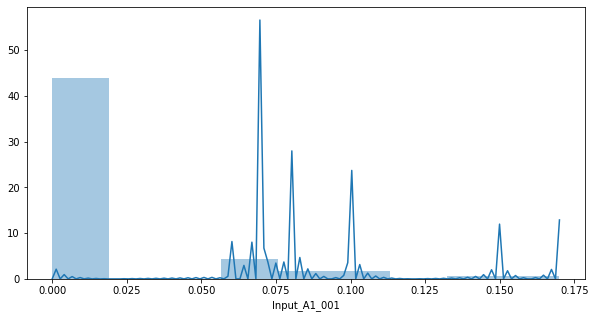

In [3]:
plt.figure(figsize=(10,5))
plt.tight_layout()
seabornInstance.distplot(dataset['Input_A1_001'])

In [4]:
X = dataset.iloc[:,1:24]
y = dataset['Output_A1']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [6]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

2.317534555141595
[-1.03064191e+01  4.21862495e+01 -5.15511114e+01 -7.29373238e-01
  1.02871075e+01  1.29991998e+01  1.23935803e+01  3.01980663e-14
  1.32601360e+01  2.84217094e-14 -4.09391758e+01  1.83115658e+01
  1.91157061e+01  3.66733631e+01 -3.06700531e+00  2.45710522e+01
 -1.37435068e+01 -3.03218973e+00 -7.40641809e+00  1.45378588e+00
  1.94420431e+01 -9.07212966e+01  1.94420431e+01]


In [8]:
y_pred = regressor.predict(X_test)

In [10]:
y_test = np.array(list(y_test))
y_pred = np.array(y_pred)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,3.910,3.825736
1,3.414,3.852086
2,4.086,4.794031
3,3.670,3.565764
4,4.201,3.300495
5,4.042,4.743482
6,3.532,3.331091
7,4.016,3.260565
8,3.987,3.950207
9,4.339,2.898226


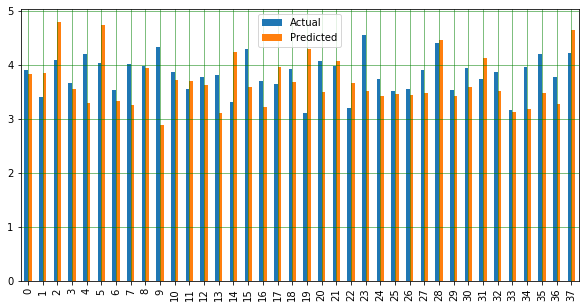

In [25]:
#df1 = df.head(25)
df.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

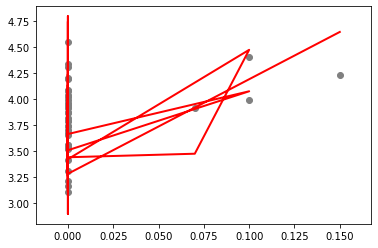

In [28]:
plt.scatter(X_test.iloc[:,0], y_test,  color='gray')
plt.plot(X_test.iloc[:,0], y_pred, color='red', linewidth=2)
plt.show()

In [13]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.4509270629652775
Mean Squared Error: 0.3223681209800475
Root Mean Squared Error: 0.567774709704516


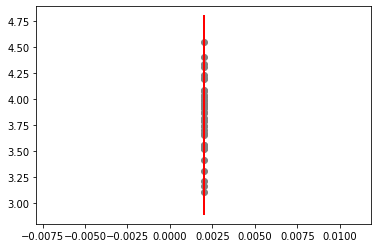

In [29]:
plt.scatter(X_test.iloc[:,9], y_test,  color='gray')
plt.plot(X_test.iloc[:,9], y_pred, color='red', linewidth=2)
plt.show()